In [12]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from scipy import io as sio
from tensorflow.python.framework import ops
from dfs2 import DeepFeatureSelectionNew
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Imputer

data_PFC = sio.loadmat("/Volumes/TONY/LabWW/Alzheimer/GSE44772/GSE44772_PFC.mat")
data_VC = sio.loadmat("/Volumes/TONY/LabWW/Alzheimer/GSE44772/GSE44772_VC.mat")
data_CR = sio.loadmat("/Volumes/TONY/LabWW/Alzheimer/GSE44772/GSE44772_CR.mat")

def setRegion(region):
    if region == 'PFC':
        ourdata = data_PFC
    elif region == 'VC':
        ourdata = data_VC
    elif region == 'CR':
        ourdata = data_CR
    elif region == 'All':
        ourdata = data_All
        
    inputX = ourdata['X']
    # Inpute using median
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp.fit(inputX)
    inputX = imp.transform(inputX)
    
    inputY = ourdata['y'][0,:]
    
    ID = ourdata['ID'][:,1]
    
    return inputX, inputY, ID

In [13]:
inputX, inputY, ID = setRegion('CR')

IG = sio.loadmat('../data/CR_IG.mat')
ig = IG['IG'][0]

In [8]:
import numpy as np

np.sort(ig)[:1000]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.95243957e-09,   4.95243957e-09,   4.95243957e-09,
         4.95243957e-09,   4.95243957e-09,   4.95243960e-09,
         4.95243960e-09,   4.95243960e-09,   4.95243960e-09,
         4.95243960e-09,   4.95243960e-09,   1.26487244e-08,
         1.26487244e-08,   1.26487244e-08,   1.26487244e-08,
         1.26487244e-08,   1.26487244e-08,   1.26487244e-08,
         1.26487244e-08,   2.62428749e-08,   2.62428749e-08,
         2.62428749e-08,   2.62428749e-08,   2.62428749e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         5.67257006e-08,   5.67257006e-08,   5.67257006e-08,
         1.87176203e-07,   1.87176203e-07,   1.87176203e-07,
         1.87176203e-07,

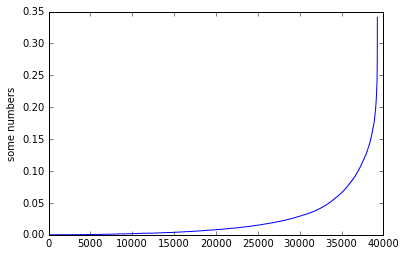

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.sort(ig))
plt.ylabel('some numbers')
plt.show()

In [28]:
# Resplit the data
X_train, X_test, y_train, y_test = train_test_split(inputX[:,list(np.argsort(ig)[1000:])], inputY, test_size=0.2, random_state=10)

# Change number of epochs to control the training time
dfsMLP = DeepFeatureSelectionNew(X_train, X_test, y_train, y_test, n_input=1, hidden_dims=[100], dropout=[False], \
                             learning_rate=0.01, lambda1=0.001, lambda2=1, alpha1=0.1, alpha2=0, activation='tanh', weight_init='uniform', \
                             epochs=100, optimizer='Adam', print_step=20)

dfsMLP.train(batch_size=200)
print("Train finised for random state: " + str(i))

epoch 0: global loss = 44.4201622009
('Train accuracy:', 0.81521738)
('Test accuracy:', 0.78260869)
epoch 20: global loss = 4.17504739761
('Train accuracy:', 0.95652175)
('Test accuracy:', 0.80434781)
epoch 40: global loss = 0.925636291504
('Train accuracy:', 0.98369563)
('Test accuracy:', 0.80434781)
epoch 60: global loss = 0.519593238831
('Train accuracy:', 0.98913044)
('Test accuracy:', 0.82608694)
epoch 80: global loss = 0.411811649799
('Train accuracy:', 0.98913044)
('Test accuracy:', 0.82608694)
('Final train accuracy:', 0.98913044)
('Final test accuracy:', 0.82608694)
Train finised for random state: 1


In [19]:
inputX[:,list(np.argsort(ig)[10000:])]

array([[ 0.3481789 ,  0.01462415,  0.05673493, ..., -0.09563795,
         0.04556397, -0.05401342],
       [ 0.4533778 ,  0.03947394,  0.07357698, ...,  0.6555348 ,
         0.2425831 ,  0.6382657 ],
       [ 0.02860682,  0.0243808 ,  0.02888404, ..., -0.4069783 ,
        -0.2971711 , -0.3860916 ],
       ..., 
       [-0.00154337,  0.00276463, -0.09049137, ..., -0.06961978,
        -0.01171417, -0.1014901 ],
       [-0.0579574 , -0.00663689,  0.08206148, ..., -0.3193949 ,
        -0.2599154 , -0.3461221 ],
       [-0.03483004,  0.1034548 ,  0.00953177, ...,  0.02706513,
         0.1224943 ,  0.02101479]])

In [17]:
np.sort(ig)[10000:]

array([ 0.00185194,  0.00185194,  0.00185194, ...,  0.33089172,
        0.33867051,  0.34123376])